In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)

## Problem 5

In [6]:
def powerMethod(A, x0, its=100):
    vk = x0 / np.linalg.norm(x0)
    for k in range(its):
        wk = A @ vk
        v_k1 = wk / np.linalg.norm(wk)
        lambda_k = vk.T @ A @ vk
        vk = v_k1
        if k < 5:
            print(f"{k + 1}\t{lambda_k}\t{vk}")
    return lambda_k, vk

In [7]:
A = np.array([[-2,1,4], [1,1,1], [4,1,-2]])
x0 = np.array([1,2,-1])

powerMethod(A, x0)

1	-1.333333333333334	[-0.43643578  0.21821789  0.87287156]
2	-4.714285714285715	[ 0.80829038  0.11547005 -0.57735027]
3	-5.640000000000001	[-0.64483142  0.05862104  0.7620735 ]
4	-5.90721649484536	[ 0.73561236  0.02942449 -0.67676337]
5	-5.976623376623377	[-0.69215012  0.0147266   0.72160331]


(-6.0, array([ 7.07106781e-01,  1.85037171e-17, -7.07106781e-01]))

In [8]:
A = np.array([[-2,1,4], [1,1,1], [4,1,-2]])
x0 = np.array([1,2,1])

powerMethod(A, x0, 100)

1	2.666666666666667	[0.57735027 0.57735027 0.57735027]
2	3.0	[0.57735027 0.57735027 0.57735027]
3	2.9999999999999996	[0.57735027 0.57735027 0.57735027]
4	2.9999999999999996	[0.57735027 0.57735027 0.57735027]
5	2.9999999999999996	[0.57735027 0.57735027 0.57735027]


(-6.000000000000002,
 array([-7.07106781e-01,  1.14723046e-14,  7.07106781e-01]))

In [9]:
np.linalg.eig(A)

(array([-6.00000000e+00,  3.00000000e+00,  2.77080206e-16]),
 array([[ 7.07106781e-01, -5.77350269e-01,  4.08248290e-01],
        [-4.70543743e-17, -5.77350269e-01, -8.16496581e-01],
        [-7.07106781e-01, -5.77350269e-01,  4.08248290e-01]]))

In [10]:
tmp = np.sqrt(2) / 2
B = np.array([[tmp, 0, tmp], [0, 1, 0], [-tmp, 0, tmp]])

In [11]:
x0 = np.array([1, 0, 0])
powerMethod(B, x0)

1	0.7071067811865476	[ 0.70710678  0.         -0.70710678]
2	0.7071067811865477	[ 0.  0. -1.]
3	0.7071067811865476	[-0.70710678  0.         -0.70710678]
4	0.7071067811865477	[-1.  0.  0.]
5	0.7071067811865476	[-0.70710678  0.          0.70710678]


(0.7071067811865477, array([-1.,  0.,  0.]))

In [12]:
np.linalg.eig(B)

(array([0.70710678+0.70710678j, 0.70710678-0.70710678j,
        1.        +0.j        ]),
 array([[0.        -0.70710678j, 0.        +0.70710678j,
         0.        +0.j        ],
        [0.        +0.j        , 0.        -0.j        ,
         1.        +0.j        ],
        [0.70710678+0.j        , 0.70710678-0.j        ,
         0.        +0.j        ]]))

In [21]:
def inversePowerMethod(A, theta, x0, its=100):
    vk = x0 / np.linalg.norm(x0)
    for k in range(its):
        wk = np.linalg.inv(A - theta * np.eye(len(A))) @ vk
        v_k1 = wk / np.linalg.norm(wk)
        vk = v_k1
        if k % 100 == 0:
            print(f"{k + 1}\t{vk}")
    return vk

In [22]:
inversePowerMethod(A, 3.5, np.array([1,2,3]))

1	[-0.56202712 -0.57721704 -0.59240696]


array([0.57735027, 0.57735027, 0.57735027])

In [23]:
np.linalg.eig(A)

(array([-6.00000000e+00,  3.00000000e+00,  2.77080206e-16]),
 array([[ 7.07106781e-01, -5.77350269e-01,  4.08248290e-01],
        [-4.70543743e-17, -5.77350269e-01, -8.16496581e-01],
        [-7.07106781e-01, -5.77350269e-01,  4.08248290e-01]]))

In [24]:
def inversePowerMethod2(A, theta0, x0, its=100):
    vk = x0 / np.linalg.norm(x0)
    theta = theta0
    for k in range(its):
        try:
            wk = np.linalg.inv(A - theta * np.eye(len(A))) @ vk
        except np.linalg.LinAlgError:
            break
        vk1 = wk / np.linalg.norm(wk)
        theta = (vk.T @ A @ vk) / (vk.T @ vk)
        vk = vk1
    return k, vk, theta

In [25]:
inversePowerMethod2(B, 17, np.array([1,2,3]))

(7, array([-2.34509802e-18, -1.00000000e+00,  4.62588982e-19]), 1.0)

In [28]:
inversePowerMethod(B, 17, np.array([1,2,3]), 1000)

1	[-0.30011121 -0.5418171  -0.78509075]
101	[ 0.22426907 -0.97452467  0.00224659]
201	[-0.01282057 -0.99941761  0.0316241 ]
301	[-0.00367063 -0.99998717 -0.00349083]
401	[ 6.81422292e-04 -9.99999718e-01 -3.16945325e-04]
501	[ 6.71010305e-06 -9.99999994e-01  1.11293844e-04]
601	[-1.57279787e-05 -1.00000000e+00 -5.12358259e-06]
701	[ 1.56223179e-06 -1.00000000e+00 -1.89260673e-06]
801	[ 1.76337300e-07 -1.00000000e+00  3.18534388e-07]
901	[-5.35566928e-08 -1.00000000e+00  7.02663412e-09]


array([-2.32048431e-09,  1.00000000e+00,  7.83156743e-09])

## Problem 6



In [1]:
def genA(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 * (i + 1)
    for i in range(n - 1):
        A[i + 1, i] = -(i + 1)
        A[i, i + 1] = -(i + 1)
    return A

In [4]:
genA(5)

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  4., -2.,  0.,  0.],
       [ 0., -2.,  6., -3.,  0.],
       [ 0.,  0., -3.,  8., -4.],
       [ 0.,  0.,  0., -4., 10.]])

(0.30052863049765555, 15.69997482711916, -7.699030783088838, 7.699030783088838)

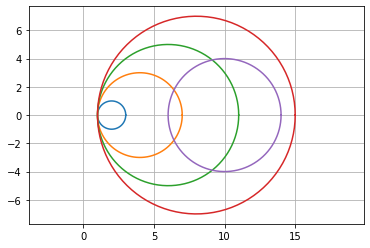

In [9]:
n = 5
an = np.linspace(0, 2 * np.pi, 100)
for i in range(n - 1):
    r = 2 * i + 1
    o = 2 * (i + 1)
    plt.plot(o + r * np.cos(an), r * np.sin(an))
plt.plot(2 * n + (n - 1) * np.cos(an), (n - 1) * np.sin(an))

plt.grid()

plt.axis('scaled')
plt.axis('equal')

# plt.savefig('6_1.pdf', dpi=100)


## Problem 7

In [33]:
n = 100
I = np.eye(n)
tmp = np.random.randn(n, n)
tmp[tmp < 2] = 2
A = 0.5 * I[np.random.permutation(n), :] + tmp - 2
A = A - np.diag(np.diag(A))
tmp = np.sum(A, 0)
tmp[tmp < 1e-10] = 1e-10
tmp = np.diag(1 / tmp)
L = A @ tmp

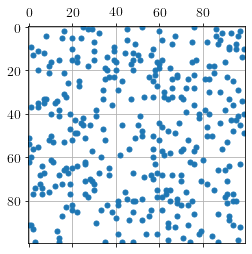

In [34]:
plt.spy(L, marker='.')
plt.grid()

# plt.savefig("p7_1.pdf", dpi=100)

In [35]:
E, V = np.linalg.eig(L)

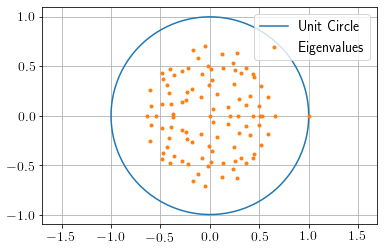

In [36]:
x = []
y = []
for i in E:
    x.append(i.real)
    y.append(i.imag)
    
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), label="Unit Circle")
plt.plot(x, y, '.', label="Eigenvalues")
plt.axis('scaled')
plt.axis('equal')
plt.grid()
plt.legend()

# plt.savefig("p7_2.pdf", dpi=100)

In [48]:
kappa = 0.5
E = np.full((n, n), 1/n)
S = kappa * L + (1 - kappa) * E

In [49]:
Es, Vs = np.linalg.eig(S)

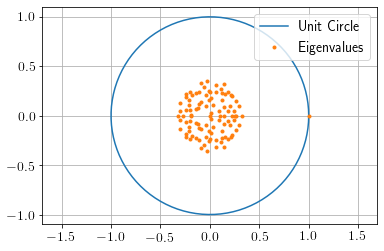

In [50]:
x = []
y = []
for i in Es:
    x.append(i.real)
    y.append(i.imag)
    
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), label="Unit Circle")
plt.plot(x, y, '.', label="Eigenvalues")
plt.axis('scaled')
plt.axis('equal')
plt.grid()
plt.legend()